In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

In [3]:
# 4 CPUs
file = '/home/yongha/mcwa/1DFreeFormDQN/experiments/DQN/2022_09_16_14_07_55/wl900.0_angle60.0_ncells64/comp_table.csv'
df = pd.read_csv(file)
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.describe()

,reti-1,reti0,reti+1,mcwat-1,mcwat0,mcwat+1,mcwas-1,mcwas0,mcwas+1,t_reti,tpr_reti,t_mcwat,tpr_mcwat,t_mcwas,tpr_mcwas
count,667378.000000,6.673780e+05,667378.000000,667378.000000,6.673780e+05,667378.000000,667378.000000,6.673780e+05,667378.000000,667378.000000,667378.000000,667378.000000,667378.000000,667378.000000,667378.000000
mean,0.095369,6.292963e-01,0.139751,0.095547,6.285545e-01,0.139954,0.095547,6.285545e-01,0.139954,0.170328,0.547150,0.040612,0.291288,0.114737,0.888279
std,0.108292,3.184689e-01,0.188423,0.108353,3.183310e-01,0.188437,0.108353,3.183310e-01,0.188437,0.035719,0.299666,0.006523,0.050345,0.015841,0.121565
min,0.000000,1.988258e-07,0.000000,0.000000,2.255145e-07,0.000000,0.000000,2.255145e-07,0.000000,0.106895,0.001674,0.023385,0.166779,0.080572,0.625968
25%,0.021797,3.508678e-01,0.024484,0.021887,3.497859e-01,0.024585,0.021887,3.497859e-01,0.024585,0.141522,0.315213,0.035029,0.248189,0.103475,0.801204
50%,0.056098,7.721961e-01,0.065385,0.056298,7.709889e-01,0.065651,0.056298,7.709889e-01,0.065651,0.149786,0.749442,0.039526,0.278881,0.114902,0.890562
75%,0.128185,8.942982e-01,0.169839,0.128532,8.936676e-01,0.170226,0.128532,8.936676e-01,0.170226,0.187373,0.761636,0.046053,0.334283,0.125251,0.968384
max,0.981848,9.981713e-01,0.983145,0.981273,9.981820e-01,0.982961,0.981273,9.981820e-01,0.982961,0.616250,0.801606,0.089144,0.635602,0.369626,2.010462


# TMM to SMM

In [5]:
A, B = 'mcwat', 'mcwas'

In [6]:
df['gap-1'] = df[f'{A}-1'] - df[f'{B}-1']
df['gap0'] = df[f'{A}0'] - df[f'{B}0']
df['gap+1'] = df[f'{A}+1'] - df[f'{B}+1']
df['t_gap'] = df[f't_{A}'] - df[f't_{B}']
df['tpr_gap'] = df[f'tpr_{A}'] - df[f'tpr_{B}']

# Benchmark

## difference in transmittance

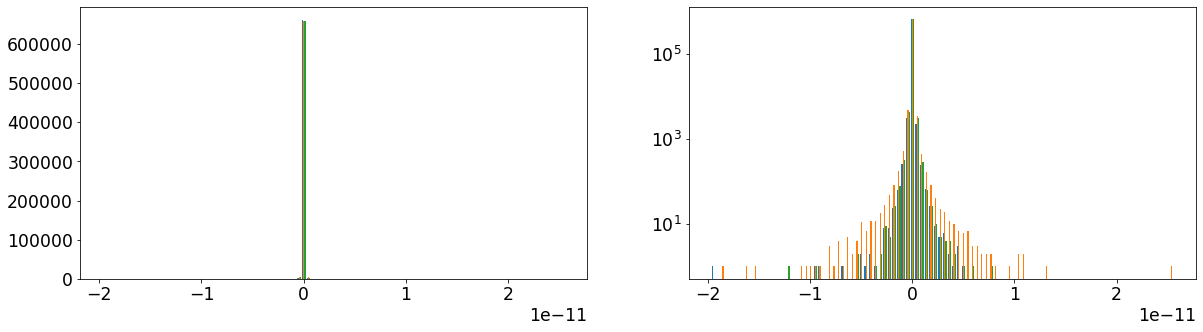

In [7]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].hist([df['gap-1'], df['gap0'], df['gap+1']], bins=100)
axes[1].hist([df['gap-1'], df['gap0'], df['gap+1']], bins=100)
axes[1].set_yscale('log')
plt.show()

In [8]:
df[['gap-1','gap0','gap+1']].describe().T

,count,mean,std,min,25%,50%,75%,max
gap-1,667378.0,-1.727269e-17,6.930526e-14,-1.966033e-11,-7.896461e-15,0.000000e+00,7.896461e-15,5.201228e-12
gap0,667378.0,-1.372482e-16,1.339811e-13,-1.848022e-11,-3.214096e-14,-1.006140e-16,3.197442e-14,2.558151e-11
gap+1,667378.0,-9.535141e-17,7.213721e-14,-1.198236e-11,-8.604228e-15,0.000000e+00,8.507084e-15,7.755574e-12


In [9]:
pd.concat([df['gap-1'], df['gap0'], df['gap+1']]).describe()

count    2.002134e+06
mean    -8.329076e-17
std      9.653654e-14
min     -1.966033e-11
25%     -1.301736e-14
50%      0.000000e+00
75%      1.298961e-14
max      2.558151e-11
dtype: float64

In [10]:
a=pd.concat([df['gap-1'], df['gap0'], df['gap+1']])
cut = 0.01
b=a[abs(a) < cut]
b.count()/a.count() *100

100.0

In [11]:
df[abs(df['gap-1'])>cut][[f'{A}-1', f'{B}-1', 'gap-1']].sort_values('gap-1')

,mcwat-1,mcwas-1,gap-1


In [12]:
df[abs(df['gap0'])>cut][[f'{A}0', f'{B}0', 'gap0']].sort_values('gap0')

,mcwat0,mcwas0,gap0


In [13]:
df[abs(df['gap+1'])>cut][[f'{A}+1', f'{B}+1', 'gap+1']].sort_values('gap+1')

,mcwat+1,mcwas+1,gap+1


## Normalized abs(difference in transmittance) 

In [14]:
cut = 0.01

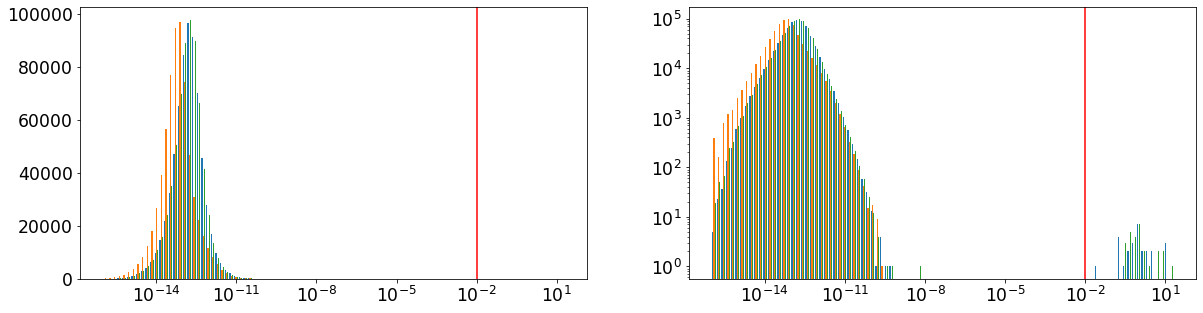

In [15]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].axvline(cut, c='r')
axes[1].axvline(cut, c='r')

axes[0].hist([abs(df['gap-1']/df[f'{A}-1']), abs(df['gap0']/df[f'{A}0']), abs(df['gap+1']/df[f'{A}+1'])], bins=np.logspace(np.log10(1E-16), np.log10(20),100))
axes[0].set_xscale('log')

axes[1].hist([abs(df['gap-1']/df[f'{A}-1']), abs(df['gap0']/df[f'{A}0']), abs(df['gap+1']/df[f'{A}+1'])], bins=np.logspace(np.log10(1E-16), np.log10(20),100))
axes[1].set_xscale('log')
axes[1].set_yscale('log')

plt.show()

right side of vertical red line: normalized error >= 1 %

orange is 0th order

In [16]:
df[abs(df['gap-1']/df[f'{A}-1'])>cut][[f'{A}-1', f'{B}-1', 'gap-1']].sort_values('gap-1')

,mcwat-1,mcwas-1,gap-1
329858,2.373935e-30,2.869381e-29,-2.631987e-29
7958,2.302872e-31,2.758670e-30,-2.528382e-30
54531,2.302872e-31,2.758670e-30,-2.528382e-30
535535,6.407064e-33,9.099297e-31,-9.035226e-31
83007,4.203941e-31,1.173520e-30,-7.531262e-31
79807,4.203941e-31,1.173520e-30,-7.531262e-31
164627,1.958375e-31,9.283327e-31,-7.324952e-31
58869,1.958375e-31,9.283327e-31,-7.324952e-31
157244,4.961964e-31,1.077038e-30,-5.808420e-31
1868,4.961964e-31,1.077038e-30,-5.808420e-31


In [17]:
df[abs(df['gap0']/df[f'{A}0'])>cut][[f'{A}0', f'{B}0', 'gap0']].sort_values('gap0')

,mcwat0,mcwas0,gap0


In [18]:
df[abs(df['gap+1']/df[f'{A}+1'])>cut][[f'{A}+1', f'{B}+1', 'gap+1']].sort_values('gap+1')

,mcwat+1,mcwas+1,gap+1
329858,3.283359e-30,4.757259e-29,-4.428923e-29
238038,8.517369e-30,2.656676e-29,-1.804939e-29
7958,5.313359e-31,2.776086e-30,-2.244750e-30
54531,5.313359e-31,2.776086e-30,-2.244750e-30
213230,1.071285e-30,1.639090e-30,-5.678050e-31
535535,4.629253e-33,5.150923e-31,-5.104631e-31
94327,4.442361e-32,3.928026e-31,-3.483790e-31
74521,4.442361e-32,3.928026e-31,-3.483790e-31
83007,5.531235e-31,8.059506e-31,-2.528271e-31
79807,5.531235e-31,8.059506e-31,-2.528271e-31


# benchmark - simulation time

## run time by time.time()

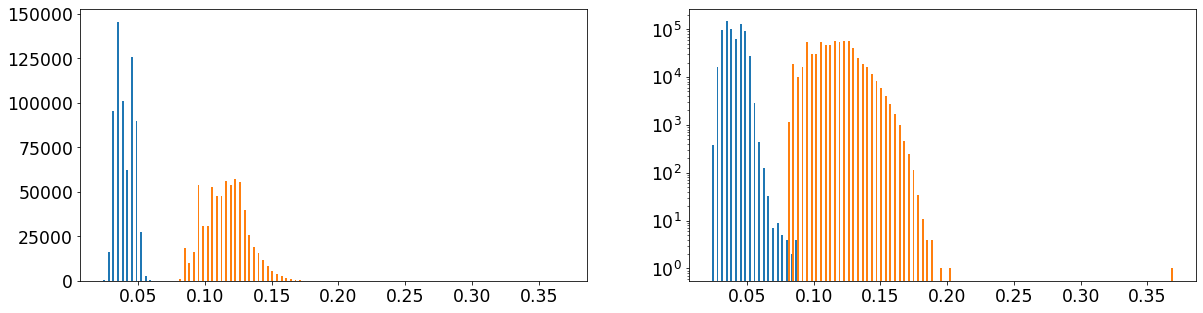

In [19]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].hist([df[f't_{A}'],df[f't_{B}']], bins=100)
axes[1].hist([df[f't_{A}'],df[f't_{B}']], bins=100, log=True)
plt.show()

Blue is  meent-TMM, Oragne is meent-SMM

## SMM time / TMM time

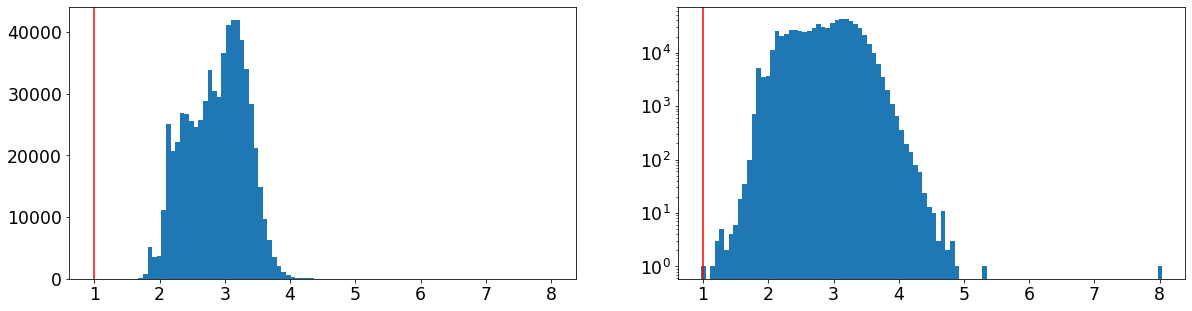

In [20]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].axvline(1, c='r')
axes[1].axvline(1, c='r')
axes[0].hist((df[f't_{B}'])/df[f't_{A}'], bins=100)
axes[1].hist((df[f't_{B}'])/df[f't_{A}'], bins=100)
axes[1].set_yscale('log')
plt.show()

In [21]:
pd.DataFrame((df[f't_{B}']/df[f't_{A}']).describe()).T

,count,mean,std,min,25%,50%,75%,max
0,667378.0,2.871407,0.449369,0.968381,2.509736,2.922914,3.220868,8.037431


meent-TMM is faster 2.9 times than SMM.

right side of red line: TMM is faster

## time.process_time()

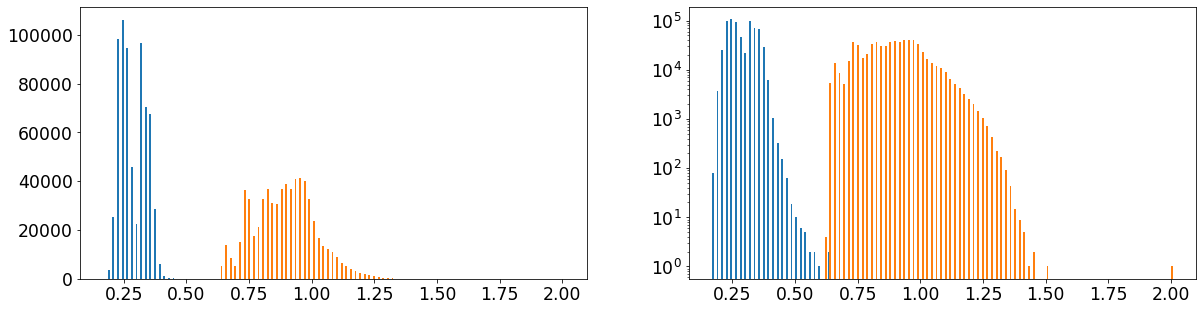

In [22]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].hist([df[f'tpr_{A}'],df[f'tpr_{B}']], bins=100)
axes[1].hist([df[f'tpr_{A}'],df[f'tpr_{B}']], bins=100, log=True)
plt.show()

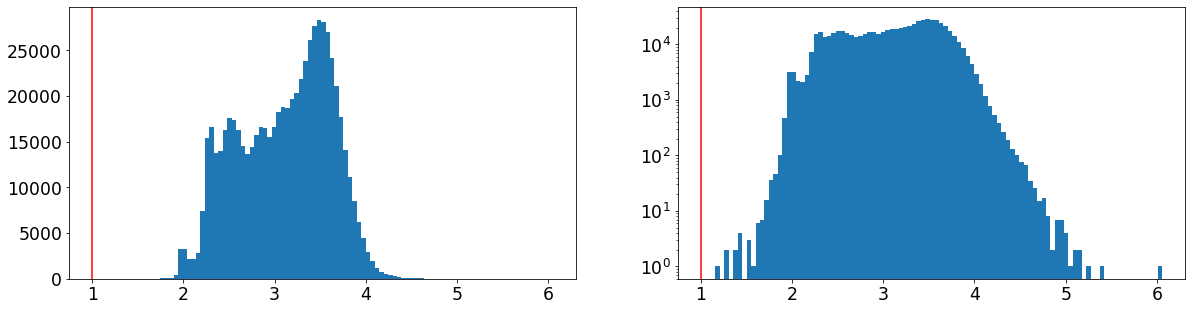

In [23]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].axvline(1, c='r')
axes[1].axvline(1, c='r')
axes[0].hist((df[f'tpr_{B}'])/df[f'tpr_{A}'], bins=100)
axes[1].hist((df[f'tpr_{B}'])/df[f'tpr_{A}'], bins=100)
axes[1].set_yscale('log')
plt.show()

In [24]:
pd.DataFrame((df[f'tpr_{B}']/df[f'tpr_{A}']).describe()).T

,count,mean,std,min,25%,50%,75%,max
0,667378.0,3.109187,0.503799,1.157268,2.688363,3.17979,3.517226,6.058321


hard to tell...